In [1]:
import cv2 

In [2]:
import matplotlib.pyplot as plt

In [3]:
frozen_model='frozen_inference_graph.pb'
config = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config)

In [5]:
classes=[]
labels = 'labels.txt'
with open(labels,'r') as ftp:
    classes = ftp.read().rstrip('\n').split('\n')

In [6]:
classes

['bicycle',
 'person',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
#read an image 
img = cv2.imread('photo.jpg')

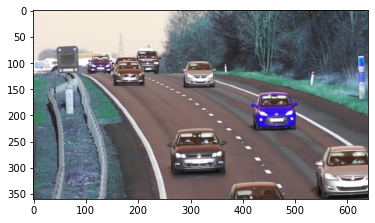

In [8]:
plt.imshow(img)

In [9]:
len(classes)

80

In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000231F9A81CF0>

In [11]:
classids,conf,bbox =model.detect(img,confThreshold=0.5)

In [12]:
classids

array([[3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3]], dtype=int32)

In [13]:
cap=cv2.VideoCapture(0)
#Use cv2.VideoCapture() to get a video capture object for the camera
cap.set(3,640)
cap.set(4,480)

while True:
    # Capture the video frame
    # by frame
    success , image=cap.read()
    classids,conf,bbox =model.detect(image,confThreshold=0.5)#bbox dimeintons #rate %
    if len(classids) !=0:
        print(classids,bbox)
        for classid , confidence , box in zip(classids.flatten(),conf.flatten(),bbox):
            cv2.rectangle(image,box,color=(255,0,0),thickness=2)
            cv2.putText(image,classes[classid],(box[0]+10,box[1]+30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            cv2.putText(image, str(confidence) , (box[0] + 150, box[1] + 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
        cv2.imshow('image',image)
        cv2.waitKey(1)

[[ 1]
 [ 1]
 [72]] [[213  72 418 343]
 [174 259 219 127]
 [ 29  52 602 379]]
[[1]] [[229  65 406 360]]
[[1]] [[245  75 389 342]]
[[1]] [[240  82 395 341]]
[[1]
 [1]
 [1]] [[453  70 184 354]
 [250  87 384 303]
 [531  84 107 341]]
[[1]
 [1]] [[449  80 188 343]
 [233  94 400 337]]
[[1]
 [1]] [[534  96 104 324]
 [462  83 174 338]]
[[1]] [[224 105 410 325]]
[[ 1]
 [72]
 [ 1]] [[459  83 178 340]
 [ 69  30 557 409]
 [533  94 104 326]]
[[ 1]
 [72]] [[445  77 193 344]
 [ 10  29 620 404]]
[[1]] [[448  75 190 340]]
[[ 1]
 [72]
 [ 1]] [[444  72 196 346]
 [  6  30 624 414]
 [192 300 198 116]]
[[72]
 [ 1]
 [ 1]] [[  7  26 624 418]
 [446  69 193 348]
 [190 299 201 116]]
[[ 1]
 [ 1]
 [72]] [[191 299 200 116]
 [448  67 192 350]
 [  7  28 625 416]]
[[1]
 [1]] [[446  68 194 347]
 [192 298 201 118]]
[[1]
 [1]] [[192 297 204 118]
 [450  69 189 346]]
[[1]
 [1]] [[192 297 203 117]
 [448  69 191 348]]
[[1]
 [1]] [[193 296 204 117]
 [445  69 194 349]]
[[1]
 [1]] [[192 295 209 118]
 [447  72 192 348]]
[[1]
 [1]

IndexError: list index out of range